### The story
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them which customer is more likely to get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction. This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc.

#### Importing the necessary Libraries

In [139]:
# importing the necessary libraries:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None) # this will show the entire coloumns 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#pip install -U scikit-learn (this is to get the min&max for scatterplot)

In [140]:
# we read the csv file which contains the data on 10128 customers in the bank:
card=pd.read_csv('BankChurners.csv')
card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### Data Cleaning

In [141]:
# lets drop the last 2 columns as there are some sort of irrelevant analysis and we dont need them.

card=card.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)


In [142]:
# to check for missing values
card.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [144]:
# to check if there is any 'Unknown' values in the dataframe
card.where(card == 'Unknown').count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [150]:
# we drop the rows with 'Unknown' values for 'Marital_Status' & 'income category':
card.drop(card[card['Education_Level'].str.contains('Unknown')].index, inplace=True) 
card.drop(card[card['Marital_Status'].str.contains('Unknown')].index, inplace=True)
card.drop(card[card['Income_Category'].str.contains('Unknown')].index, inplace=True)    
               

#### Priliminary analysis 

In [151]:
# to get a glimpse of the average of the data based on the gender: 
pd.pivot_table(card, values=['Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], index='Gender')

,Avg_Open_To_Buy,Avg_Utilization_Ratio,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Months_Inactive_12_mon,Months_on_book,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
Gender,,,,,,,,,,,,,
F,2786.758163,0.372560,2.402074,3936.542163,46.436741,2.354370,36.013333,0.752438,0.713342,3.826667,1149.784000,4268.376593,65.887111
M,11458.430572,0.200126,2.502159,12642.067377,46.266595,2.331894,35.952240,0.768002,0.709837,3.812736,1183.636805,4508.976255,63.243119


In [6]:
card['Marital_Status'].value_counts()

Married     4194
Single      3499
Divorced     655
Name: Marital_Status, dtype: int64

In [7]:
card['Income_Category'].value_counts()

Less than $40K    3311
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64

In [9]:
card['Attrition_Flag'].value_counts()

Existing Customer    7020
Attrited Customer    1328
Name: Attrition_Flag, dtype: int64

In [153]:
# 'Attrition' is our Dependent Variable for the Logistic Regression, therefore we create
# a binary variable:
card['Attrition']= np.where(card['Attrition_Flag'] == 'Attrited Customer', 1 ,0)
card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0


In [154]:
# Export the cleaned DataFrame back to csv in order to be used for Tableau analysis in the future:
card.to_csv('card_tableau1.csv', index=False)


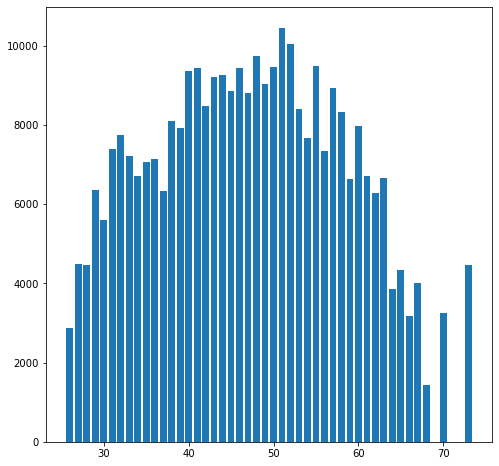

In [157]:
# we want a bar chart to plot the average credit limit against age:
#plt.subplots(figsize=(8,8)) # this will be applied to all the plots from now on.

grp = card.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()
x= grp['Customer_Age']
y =grp['Credit_Limit']
plt.bar(x=x, height=y)
plt.plot(figsize=(8,8))


plt.show()

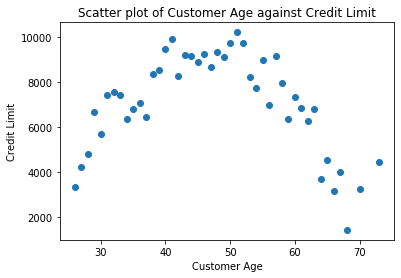

In [12]:
# scatter plot of credit limit and age
plt.scatter(x=grp['Customer_Age'], y=grp['Credit_Limit'])
plt.xlabel ('Customer Age')
plt.ylabel ('Credit Limit')
plt.title ('Scatter plot of Customer Age against Credit Limit')
plt.show()

In [17]:
# to get the average months on book for both genders:
pd.pivot_table(card, values='Months_on_book', index='Gender') # default function for 'values' is mean 

,Months_on_book
Gender,
F,36.063782
M,35.918391


In [18]:
# to get the average credit limit for both genders:
pd.pivot_table(card, values='Credit_Limit', index='Gender') # default function for 'values' is mean 

,Credit_Limit
Gender,
F,3923.752901
M,12620.955701


In [20]:
# to get the percentage of the existing and churned customers:
card['Attrition'].value_counts(normalize=True)


0    0.84092
1    0.15908
Name: Attrition, dtype: float64

In [17]:
# the correlation between 'Attrition' (DV)and the selected desired columns
# (independent variables):
card[['Attrition','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
      'Total_Trans_Amt','Avg_Utilization_Ratio']].corr()



,Attrition,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Avg_Utilization_Ratio
Attrition,1.000000,-0.018300,-0.265673,0.005451,-0.160422,-0.185231
Credit_Limit,-0.018300,1.000000,0.045030,0.996004,0.167746,-0.482457
Total_Revolving_Bal,-0.265673,0.045030,1.000000,-0.044371,0.057583,0.625420
Avg_Open_To_Buy,0.005451,0.996004,-0.044371,1.000000,0.162603,-0.538385
Total_Trans_Amt,-0.160422,0.167746,0.057583,0.162603,1.000000,-0.091037
Avg_Utilization_Ratio,-0.185231,-0.482457,0.625420,-0.538385,-0.091037,1.000000


In [18]:
# Here is the range of the correlation for interpretation:
# zero: no correlation
# weak (or negligible) correlation range between 0.0 - 0.3
# low correlation 0.3 - 0.5
# moderaye correlation 0.5 -0.7
# strong (high) correlation 0.7 - 0.9
# very high correlation 0.9 
# perfect correlation 1.0

# there is a very high correlation (0.996) between Avg_Open_To_Buy AND Credit limit 
# (this is a pre-warning that we must drop one of these independent variables).
#Total_Revolving_Balance has a negligible correlation (0.045) with Credit Limit 
# and Total Transaction amount (0.0575) .



In [20]:
#'Attrition' is negatively correlated with most of the independent variables 
# which is reasonable. For example: the higher the credit limit, th elower the chance of attrition.

In [21]:
card.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition'],
      dtype='object')

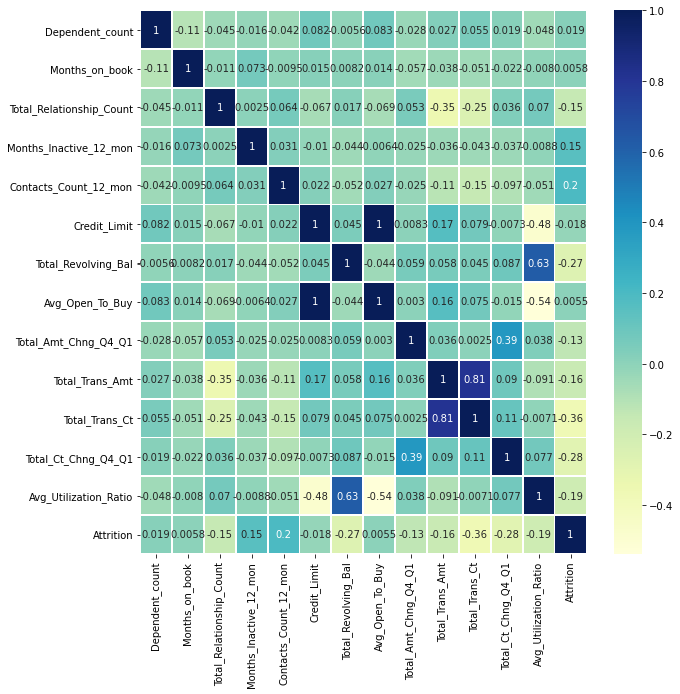

In [26]:
# creating a heatmap for the numerial columns:
plt.subplots(figsize=(10,10))

sns.heatmap(card[['Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition']].corr(), annot=True, cmap='YlGnBu', linewidths=.8)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

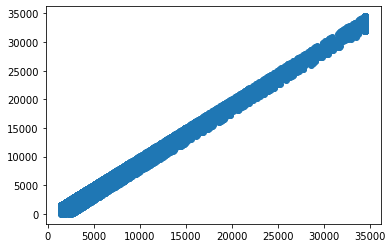

In [23]:
# another way of showing perfect correlation between credit limit and 'Avg_Open_To_Buy':
plt.scatter(x=card['Credit_Limit'], y=card['Avg_Open_To_Buy'])
plt.show

In [173]:
# based on the heatmap, we drop 'Avg_Open_To_Buy' due to perfect correlation with credit limit: 
#but we are only interested in the interactions between dependent variable 'Attrition' 
# and our selected independent varaibles:   
card[['Attrition', 'Credit_Limit','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].corr()['Attrition']



Attrition                   1.000000
Credit_Limit               -0.015815
Dependent_count             0.011423
Months_on_book              0.009249
Total_Relationship_Count   -0.145713
Months_Inactive_12_mon      0.152732
Contacts_Count_12_mon       0.193923
Credit_Limit               -0.015815
Total_Revolving_Bal        -0.265380
Total_Amt_Chng_Q4_Q1       -0.132702
Total_Trans_Amt            -0.160378
Total_Trans_Ct             -0.357261
Total_Ct_Chng_Q4_Q1        -0.280460
Avg_Utilization_Ratio      -0.183984
Name: Attrition, dtype: float64

In [175]:
#based on the above we can see that 'Dependent_count','Months_on_book' are not important,
# so we drop them
card[['Attrition',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit','Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].corr()['Attrition']



Attrition                   1.000000
Total_Relationship_Count   -0.145713
Months_Inactive_12_mon      0.152732
Contacts_Count_12_mon       0.193923
Credit_Limit               -0.015815
Total_Revolving_Bal        -0.265380
Total_Amt_Chng_Q4_Q1       -0.132702
Total_Trans_Amt            -0.160378
Total_Trans_Ct             -0.357261
Total_Ct_Chng_Q4_Q1        -0.280460
Avg_Utilization_Ratio      -0.183984
Name: Attrition, dtype: float64

In [25]:
# if we are interested in pairplot, we can use the below command:
#sns.pairplot(card)
#plt.show()

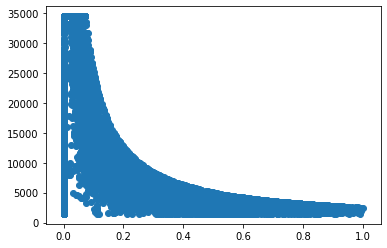

In [27]:
plt.scatter(x=card['Avg_Utilization_Ratio'], y=card['Credit_Limit'])
plt.show()

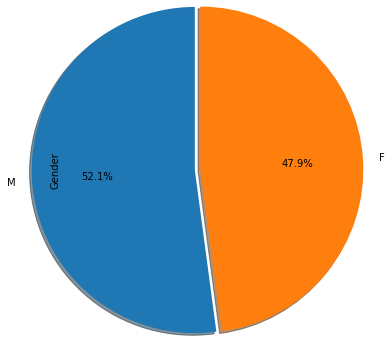

In [36]:
# to depict a pie chart for Gender:
card['Gender'].value_counts().plot.pie(autopct="%1.1f%%",explode=(0.05,0), radius=1.5,startangle=90,shadow=True)
plt.rcParams['figure.figsize'] = (5, 5)

#plt.title ('pie chart of Gender')
plt.show()

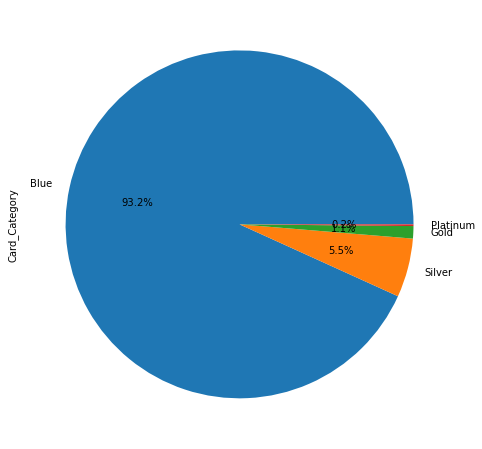

In [40]:
card['Card_Category'].value_counts().plot.pie(autopct="%1.1f%%")

#plt.title ('Card_Category')
plt.rcParams['figure.figsize'] = (8, 8)
#grid=True

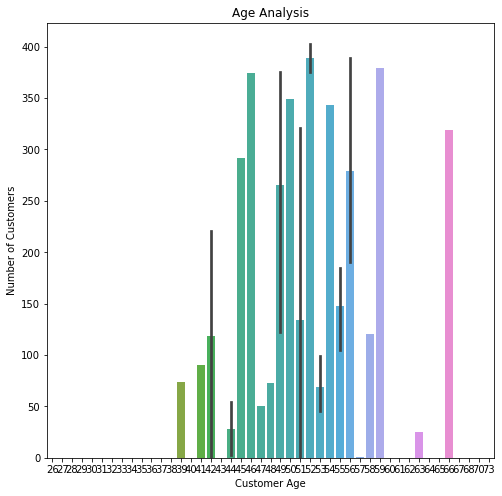

In [41]:
#plt.subplots(figsize=(10,8))
sns.barplot(x=card['Customer_Age'], y=card['Customer_Age'].value_counts())
plt.xlabel ('Customer Age')
plt.ylabel ('Number of Customers')
plt.title('Age Analysis')
plt.show()


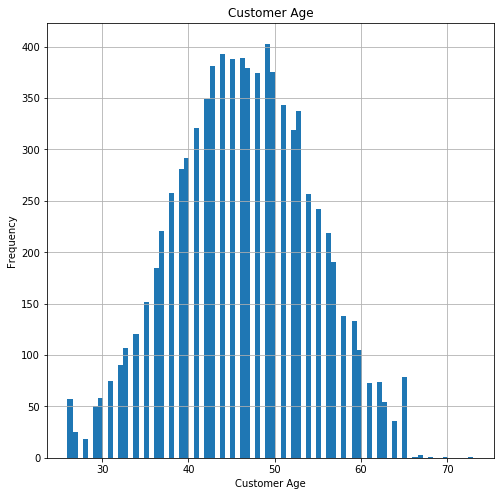

In [33]:
card['Customer_Age'].hist(bins=80)
plt.xlabel ('Customer Age')
plt.ylabel ('Frequency')
plt.title ('Customer Age')
plt.show()

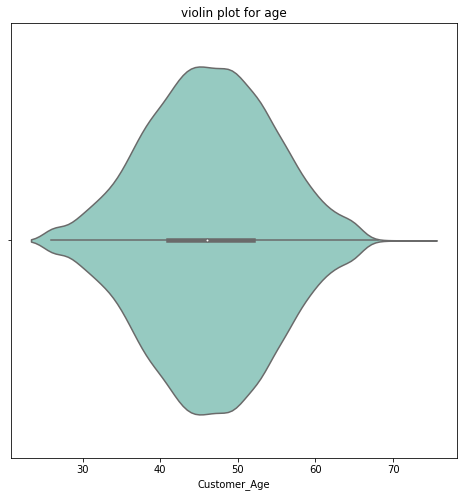

In [34]:
sns.violinplot(card['Customer_Age'], grid=True, palette='Set3')
#plt.xticks(rotation=90)
plt.title ('violin plot for age')
plt.show()

In [182]:
# lets take the numeric columns, and drop the variables that have the least correlation with attrition:
num = card.select_dtypes(include=np.number)
num= num.drop(num[['CLIENTNUM','Attrition', 'Customer_Age', 'Dependent_count','Months_on_book', 'Avg_Open_To_Buy']], axis=1)
num.head()


,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
4,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
5,3,1,2,4010.0,1247,1.376,1088,24,0.846,0.311


In [183]:
# since the range of the data is very high, it is better to normalise the data between 0 and 1 using minMaxScaler:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num1= pd.DataFrame(scaler.fit_transform(num), columns=num.columns, index=num.index)
#num1.head()

In [184]:
# we extract the desired columns form the original dataframe:
num2= card[['Attrition','CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']]

In [185]:
# now we should merge num1 and num2 dataframes:

card1=pd.concat([num2, num1], axis=1)
#card1.head()
card1.head()

,Attrition,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,0.8,0.166667,0.500000,0.340190,0.308701,0.392994,0.036260,0.258065,0.437534,0.061061
1,0,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,1.0,0.166667,0.333333,0.206112,0.343266,0.453636,0.044667,0.185484,1.000000,0.105105
2,0,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,0.6,0.166667,0.000000,0.059850,0.000000,0.763615,0.078753,0.080645,0.628164,0.000000
4,0,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,0.8,0.166667,0.000000,0.099091,0.000000,0.640271,0.017501,0.145161,0.673129,0.000000
5,0,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,0.4,0.166667,0.333333,0.077747,0.495431,0.405063,0.033057,0.112903,0.227787,0.311311


In [191]:
card1.columns

Index(['Attrition', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [54]:
#Another way to normalise a specific column using mathematic formula:

#card['Credit_Limit']=(card['Credit_Limit']-min(card['Credit_Limit']))/(card['Credit_Limit'].max()-card['Credit_Limit'].min())
# the returned values are between 0 & 1.
# formula = (x-xmin)/(xmax-xmin)


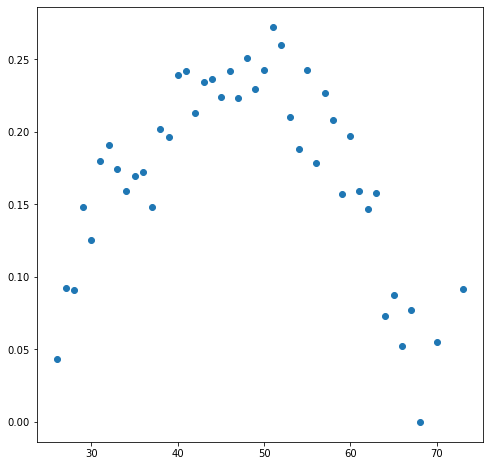

In [189]:
# Scatter between the mean of credit limit for each age category:

plt.scatter(x = card1.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Customer_Age'], 
            y = card1.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Credit_Limit'])



In [56]:
# when there is a U-shape relationship between x and y and we want to use regression, then we should 
# square the independent variable. In this case y= credit limit, x= customer age:
# to know more about this type of regression : 
#https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/

### Logistic Regression

In [194]:
# since we are dealing with attriotion, we should use the logistic regression with the normalised data:
Y= card1['Attrition'] # dependent variable
X=card1[['Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.245586
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 7081
Model:                          Logit   Df Residuals:                     7070
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.4354
Time:                        08:53:52   Log-Likelihood:                -1739.0
converged:                       True   LL-Null:                       -3080.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.6716      0.277     13.275      0.000       3.130

In [193]:
summaryL = summary_col(model,stars=True)
print(summaryL)


                          Attrition 
------------------------------------
const                    3.6716***  
                         (0.2766)   
Total_Relationship_Count -2.2286*** 
                         (0.1605)   
Months_Inactive_12_mon   2.9674***  
                         (0.2682)   
Contacts_Count_12_mon    2.6585***  
                         (0.2501)   
Credit_Limit             -0.3079    
                         (0.1954)   
Total_Revolving_Bal      -2.4892*** 
                         (0.2104)   
Total_Amt_Chng_Q4_Q1     -1.5277**  
                         (0.7304)   
Total_Trans_Amt          7.5797***  
                         (0.4470)   
Total_Trans_Ct           -13.0210***
                         (0.5102)   
Total_Ct_Chng_Q4_Q1      -10.2346***
                         (0.8142)   
Avg_Utilization_Ratio    -0.0419    
                         (0.2816)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [45]:
# interpretation of the coefficients:

# 'Total_Revolving_Bal ' coefficient is negative: customers who have higher revolving balance with the bank 
# are less likely to have churned.
# Credit_Limit coefficient is negative: customers who have higher  credit limit are less likely to have churned.
# 'Months_Inactive_12_mon' & 'Contacts_Count_12_mon' & 'Total_Trans_Amt' coefficients are positive. It means that
# customers who were inactive in the last 12 months, had higher number of contacts & had higher transaction amount
# are very likely to churn. 
# when the p-value is less than 5%, the intervals will NOT contain the ZERO.


### Logistic regression: educational level as dummy variable

In [195]:
card1['Education_Level'].value_counts()

Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: Education_Level, dtype: int64

In [199]:
edu=pd.get_dummies(card1['Education_Level'])
edu.drop(['Uneducated'], axis=1, inplace=True) # we should drop one to be able to compare the result with that.
Y= card1['Attrition'] # dependent variable
X=card1[['Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
X=pd.concat([edu, X], axis=1)
X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.244980
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 7081
Model:                          Logit   Df Residuals:                     7065
Method:                           MLE   Df Model:                           15
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.4368
Time:                        09:11:41   Log-Likelihood:                -1734.7
converged:                       True   LL-Null:                       -3080.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.6349      0.295     12.335      0.000       3.057

In [203]:
# It seems that customers with'Doctorate' Educational Level are more likely to churn
# as compared to 'Uneducated' group as the oefficients is significant.

### Logistic Regression, Marital status as Dummy Variable

In [51]:
card1['Marital_Status'].value_counts()

Married     4194
Single      3499
Divorced     655
Name: Marital_Status, dtype: int64

In [197]:
# to perform the Logistic regression with dummy variables:

marital=pd.get_dummies(card1['Marital_Status'])
marital.drop(['Single'], axis=1, inplace=True) # we should drop one to be able to compare the result with that.


In [202]:
Y= card1['Attrition'] # dependent variable
ivs=card1[['Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

X=pd.concat([marital, ivs], axis=1)
X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
print(model.summary())
summary_Attrition_marital=summary_col(model, stars=True)
print(summary_Attrition_marital)

Optimization terminated successfully.
         Current function value: 0.242530
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 7081
Model:                          Logit   Df Residuals:                     7068
Method:                           MLE   Df Model:                           12
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.4424
Time:                        10:10:34   Log-Likelihood:                -1717.4
converged:                       True   LL-Null:                       -3080.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.0510      0.287     14.108      0.000       3.488

Interpretation of the dummy marital status:
#1-  When the categorical variable (Divorced) is not significant, it means that the impact of 'Divorced'  is not different from the impact of the base variable (single).
#2-  'Married' category is significant and the coefficient sign is negative. It means that the 'Married' group is less likely to churn as compared to the 'single' group.

### Logistic Regression, Income category as Dummy Variable

In [204]:
card1['Income_Category'].value_counts()

Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: Income_Category, dtype: int64

In [205]:
# performing a cross tab to compare income with card categories:

pd.crosstab(card['Card_Category'], card['Income_Category'])


Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Card_Category,,,,,
Blue,508,1327,1006,1088,2669
Gold,14,10,22,16,19
Platinum,4,1,3,0,3
Silver,46,74,72,98,101


In [206]:
# now, lets take the income category 
income=pd.get_dummies(card1['Income_Category'])
income.drop(['Less than $40K'], axis=1, inplace=True)


In [207]:
ivs=card1[['Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

X=pd.concat([income, ivs], axis=1)
X=sm.add_constant(X)

model1=sm.Logit(Y, X).fit()
print(model1.summary())
summary_Attrition_income = summary_col(model1, stars=True)
print(summary_Attrition_income)

Optimization terminated successfully.
         Current function value: 0.243733
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 7081
Model:                          Logit   Df Residuals:                     7066
Method:                           MLE   Df Model:                           14
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.4397
Time:                        10:13:09   Log-Likelihood:                -1725.9
converged:                       True   LL-Null:                       -3080.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.9322      0.284     13.822      0.000       3.375

Here the '40-60k', '60k - 80k', and '80k - 120k' categories are significant and negative, it means  that these categories are less likely to churn as compared to the base category of 'less than 40k'.

The impact of the '120k+' category is not significant, it means that there is no difference 
between the impact of '120k+' group and the impact of the base group (less than 40k).


### At this point we are interested to predict the number of customers who churned when the income categories are used.

In [210]:
Y_pred_i=model1.predict(X)

churn_income_cat=Y_pred_i.to_frame('churn_income_cat')
churn_income_cat=pd.concat([Y, churn_income_cat], axis=1)
churn_income_cat['churned1']=np.where(churn_income_cat['churn_income_cat']>0.5, 1,0)
# this is because we are dealing with dummy variables of 0 and 1, therefore if the 'churn_income_cat' is greater than
# 0.5, it means the customers have churned, otherwise stayed  with the bank.
churn_income_cat.head(5)


,Attrition,churn_income_cat,churned1
0,0,0.003590,0
1,0,0.000021,0
2,0,0.004944,0
4,0,0.000496,0
5,0,0.187542,0


In [62]:
churn_income_cat['churned1'].value_counts()

0    7357
1     991
Name: churned1, dtype: int64

In [110]:
# to get the percentage:
churn_income_cat['churned1'].value_counts(normalize=True)

0    0.881289
1    0.118711
Name: churned1, dtype: float64

In [211]:
# we would like to identify the customers whom we predict are going to leave (using client number) in 
# order to provide strategic advice. 

advice=pd.concat([churn_income_cat['churned1'], card[['CLIENTNUM','Months_on_book', 'Gender', 'Card_Category', 'Income_Category',
                                                       'Customer_Age', 'Marital_Status', 'Credit_Limit']]], axis=1)
advice.head()

,churned1,CLIENTNUM,Months_on_book,Gender,Card_Category,Income_Category,Customer_Age,Marital_Status,Credit_Limit
0,0,768805383,39,M,Blue,$60K - $80K,45,Married,12691.0
1,0,818770008,44,F,Blue,Less than $40K,49,Single,8256.0
2,0,713982108,36,M,Blue,$80K - $120K,51,Married,3418.0
4,0,709106358,21,M,Blue,$60K - $80K,40,Married,4716.0
5,0,713061558,36,M,Blue,$40K - $60K,44,Married,4010.0


In [213]:
# to see only the predicted churned customers:
advice1= advice[advice['churned1']==1]
advice1.head()

,churned1,CLIENTNUM,Months_on_book,Gender,Card_Category,Income_Category,Customer_Age,Marital_Status,Credit_Limit
21,1,708508758,49,F,Blue,Less than $40K,62,Married,1438.3
37,1,785432733,36,F,Gold,Less than $40K,42,Married,15433.0
40,1,827111283,41,M,Blue,$80K - $120K,45,Single,32426.0
51,1,779471883,40,F,Blue,Less than $40K,54,Married,1438.3
54,1,714374133,36,M,Blue,$120K +,56,Married,15769.0


In [214]:
advice1.to_csv('Advice_Customers.csv')

In [215]:
print(advice1['Gender'].value_counts())
print(advice1['Card_Category'].value_counts())
print(advice1['Income_Category'].value_counts())
print(advice1['Marital_Status'].value_counts())


F    415
M    403
Name: Gender, dtype: int64
Blue        776
Silver       34
Gold          7
Platinum      1
Name: Card_Category, dtype: int64
Less than $40K    361
$40K - $60K       158
$80K - $120K      128
$60K - $80K        97
$120K +            74
Name: Income_Category, dtype: int64
Married     434
Single      326
Divorced     58
Name: Marital_Status, dtype: int64


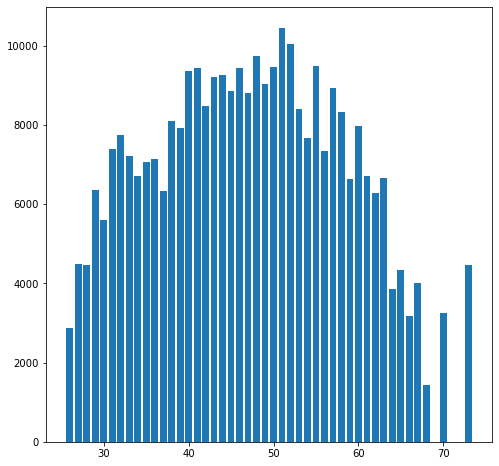

In [216]:
# we would like to see if there is still a U-shape relationship between credit limit and age in the predicted customers:
adv1 = advice.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Customer_Age']
adv2 = advice.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Credit_Limit']
plt.bar(x=adv1, height=adv2)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


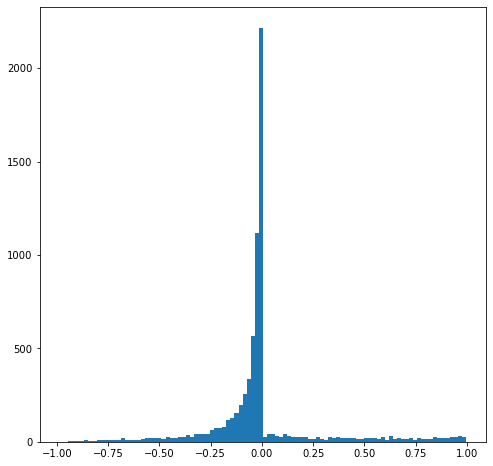

In [217]:
#  Residual Plot:
residuals=Y-Y_predi
plt.hist(residuals, bins=100)
plt.show()

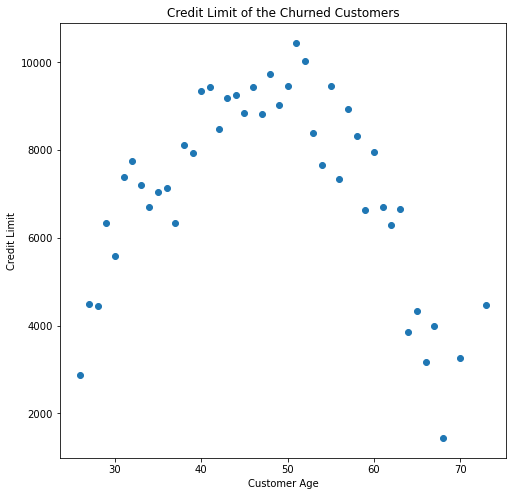

In [218]:
plt.scatter(x=adv1, y=adv2)
plt.xlabel ('Customer Age')
plt.ylabel ('Credit Limit')
plt.title ('Credit Limit of the Churned Customers')
plt.show()